In [42]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math as m
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
le= LabelEncoder()
mmax= MinMaxScaler()
ohe = OneHotEncoder()
sc= StandardScaler()
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import ElasticNet,Lasso,Ridge,LinearRegression,SGDRegressor
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
from sklearn.model_selection import KFold, cross_val_score

## ABOUT THE DATA AND THE PROBELM

The data given in the problem is regarding a bank's customer churn, i.e. The customer will leave the bank or stay. There are several types of information collected namely –

Loan ID, Gender, Marital Status, Dependants, Education Status, Self-

RowNumber—corresponds to the record (row) number and has no effect on the output.

CustomerId—contains random values and has no effect on customer leaving the bank.

Surname—the surname of a customer has no impact on their decision to leave the bank.

CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography—a customer’s location can affect their decision to leave the bank.

Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal 
and less likely to leave a bank.

Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts—refers to the number of products that a customer has purchased through the bank.

HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember—active customers are less likely to leave the bank.

EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited—whether or not the customer left the bank.

On the basis of several information collected under these heads, the bank will decide that particular customer will be provided staying with the bank or not and will help to implement this in the banking system sucessfully.

We have tried to find out the best model which is fairly accurate in predicting weather Loan for a particular Loan Application will be Approved or not.

In [3]:
data = pd.read_csv('Churn Modeling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df = data.drop(['RowNumber','CustomerId'],axis=1)

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.shape

(10000, 12)

In [10]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
cat_cols=['Geography', 'Gender']

In [13]:
numcols= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']

<Axes: xlabel='Geography', ylabel='count'>

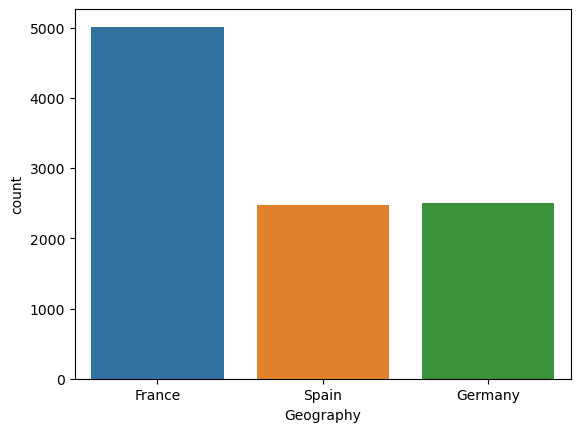

In [14]:
sns.countplot(df,x='Geography')

<Axes: xlabel='Gender', ylabel='count'>

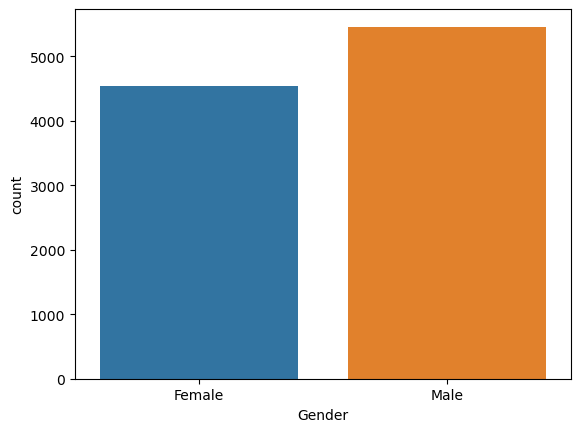

In [15]:
sns.countplot(df,x='Gender')

## Country wise customer segmentation

* France has the highest number of customers for this particular data followed by Spain and Germany.
* There are more male Customers as compared to Females.

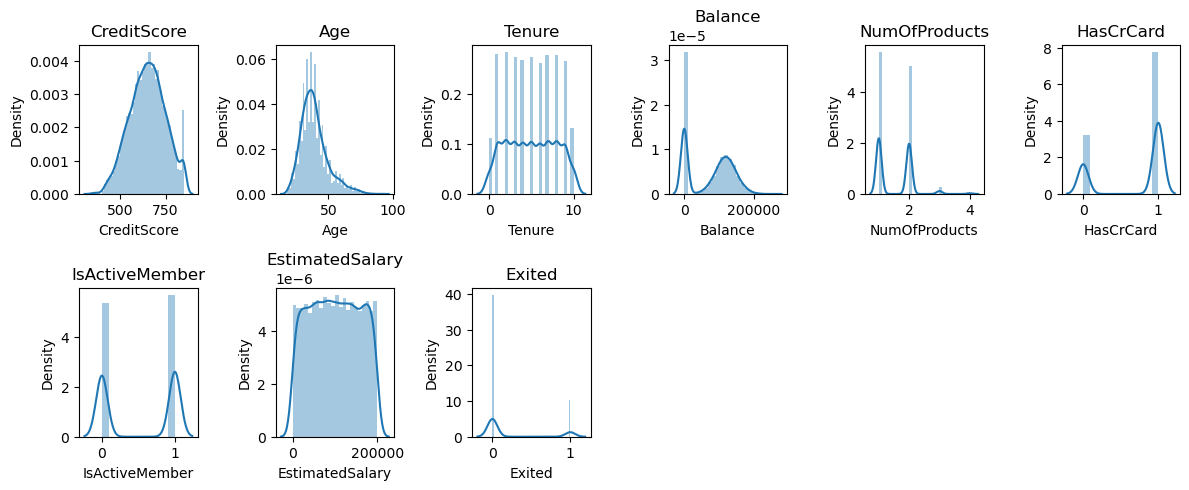

In [43]:
nrows=3
ncols=6
rep=1

plt.figure(figsize=(12,7))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.distplot(df.loc[:,i])
    rep=rep+1
    plt.title(i)
plt.tight_layout()
plt.show()

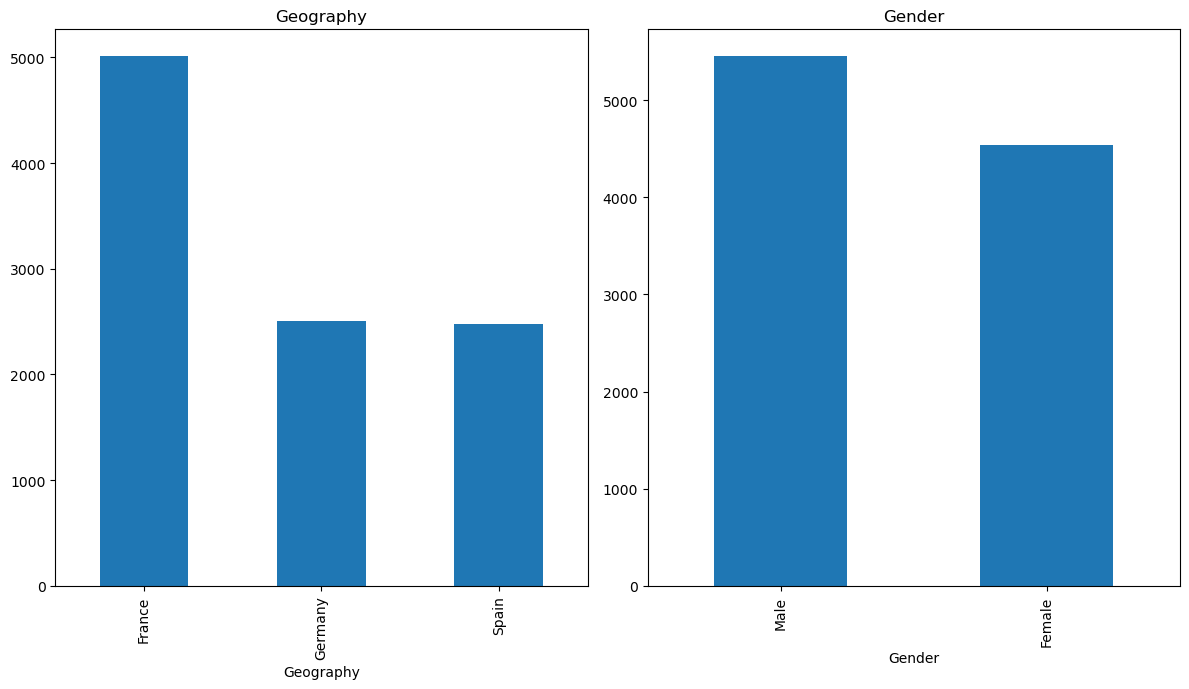

In [18]:
nrows=1
ncols=2
rep=1

plt.figure(figsize=(12,7))
for i in catcols:
    plt.subplot(nrows,ncols,rep)
    df.loc[:,i].value_counts().plot(kind='bar')
    rep=rep+1
    plt.title(i)
plt.tight_layout()
plt.show()

In [19]:
total_c = df.Surname.value_counts().sum()

In [20]:
total_c

10000

In [24]:
lost=(df.Exited==1).sum()

In [25]:
lost

2037

In [26]:
churn = (total_c/lost)*100
print(churn)

490.9180166912126


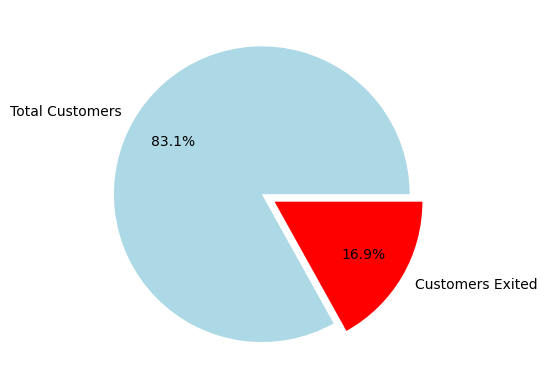

In [27]:
labels = ['Total Customers', 'Customers Exited']
sizes= [total_c,lost]

plt.pie(sizes,labels=labels,colors=['lightblue','red'],pctdistance=0.7,autopct='%1.1f%%',explode=(0,0.1))
plt.show()

* The bank has lost around 16.9 % of customers from the total Churn.
* This accounts for 490 customers out of 10000 customers.

In [28]:
df1=df.drop('Surname',axis=1)

In [29]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [31]:
def geog(i):
    if i=='France':
      return 0
    elif i=='Germany':
      return 1
    else:
      return 2 

In [35]:
df1.Geography = df1.Geography.apply(geog)

In [33]:
def gender(i):
    if i=='Male':
        return 0
    else: 
        return 1

In [36]:
df1.Gender = df1.Gender.apply(gender)

In [37]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,1,0,42,3,75075.31,2,1,0,92888.52,1


<Axes: >

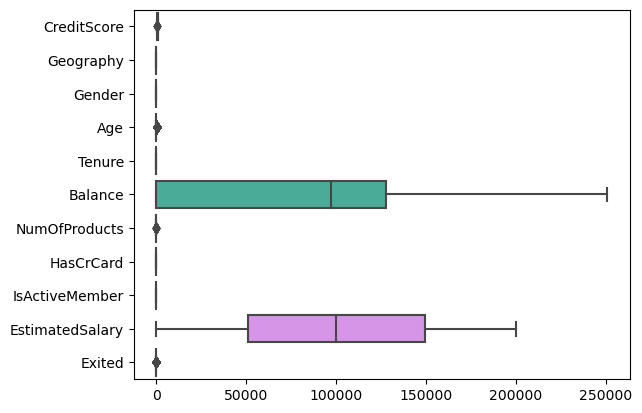

In [39]:
sns.boxplot(df1,orient='h')

In [40]:
df1.std()

CreditScore           96.653299
Geography              0.827529
Gender                 0.497932
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [41]:
cols= ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [44]:
df2=sc.fit_transform(df1.loc[:,cols])

In [45]:
df2 = pd.DataFrame(data=df2,columns=cols)

In [46]:
df2['Exited'] = df1.Exited

In [47]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,-0.901886,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
1,-0.440036,1.515067,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
2,-1.536794,-0.901886,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
3,0.501521,-0.901886,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0
4,2.063884,1.515067,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,-0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0
9996,-1.391939,-0.901886,-0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0
9997,0.604988,-0.901886,1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1
9998,1.256835,0.306591,-0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1


In [48]:
df2.std()

CreditScore        1.000050
Geography          1.000050
Gender             1.000050
Age                1.000050
Tenure             1.000050
Balance            1.000050
NumOfProducts      1.000050
HasCrCard          1.000050
IsActiveMember     1.000050
EstimatedSalary    1.000050
Exited             0.402769
dtype: float64

<Axes: >

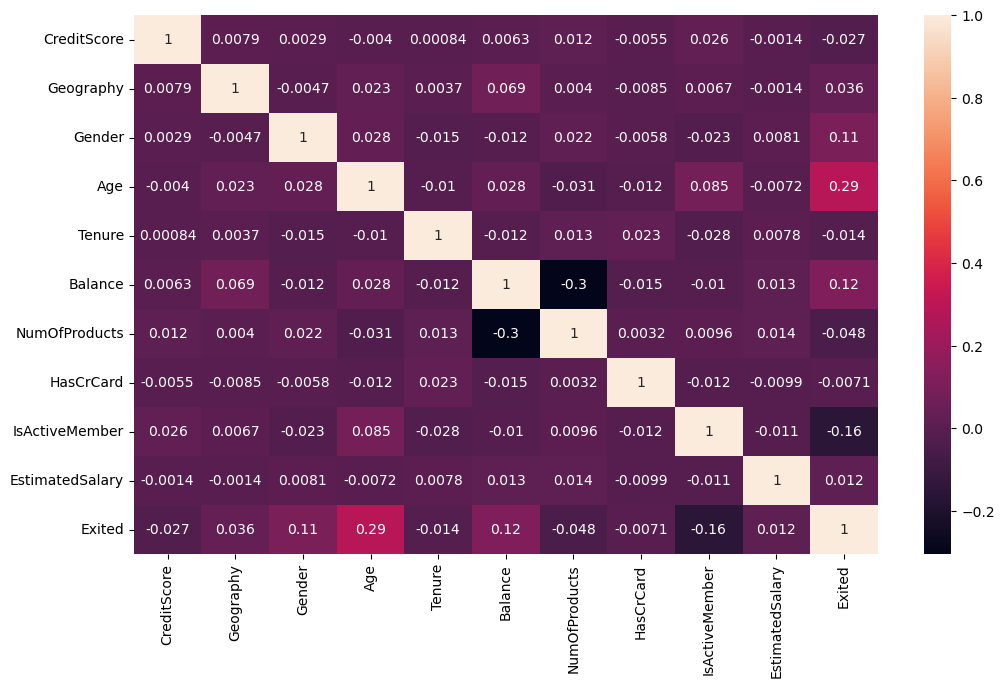

In [49]:
plt.figure(figsize=(12,7))
sns.heatmap(df2.corr(),annot=True)

## Data Modelling

In [50]:
X=df2.drop('Exited',axis=1)
y=df['Exited']

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
xtrain_c=sma.add_constant(xtrain)
xtest_c=sma.add_constant(xtest)

In [53]:
m1=sma.Logit(ytrain,xtrain_c).fit()

Optimization terminated successfully.
         Current function value: 0.436152
         Iterations 6


In [54]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7989
Method:                           MLE   Df Model:                           10
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.1379
Time:                        20:09:30   Log-Likelihood:                -3489.2
converged:                       True   LL-Null:                       -4047.2
Covariance Type:            nonrobust   LLR p-value:                1.942e-233
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.6188      0.034    -47.792      0.000      -1.685      -1.552
CreditScore        -0.0683      0.030     -2.285      0.022      -0.127      -0.010
Geography           0.1011      0.030      3.333      0.001       0.042       0.160
Gender              0.2740      0.030      9.124      0.000       0.215       0.333
Age                 0.7561      0.030     25.310      0.000       0.698       0.815
Tenure             -0.0807      0.030     -2.688      0.007      -0.139      -0.022
Balance             0.3012      0.032      9.388      0.000       0.238       0.364
NumOfProducts      -0.0468      0.031     -1.528      0.127      -0.107       0.013
HasCrCard          -0.0160      0.030     -0.536      0.592      -0.075       0.043
IsActiveMember     -0.5213      0.032    -16.410      0.000      -0.584      -0.459
EstimatedSalary     0.0316      0.030      1.048      0.295      -0.027       0.091
===================================================================================
"""

In [55]:
ypred_m1 = m1.predict(xtest_c)

In [56]:
ypred_prob = [0 if i<=0.5 else 1 for i in ypred_m1]

In [57]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,precision_score

In [58]:
def allmat1(model,test,predd):
    accuracy = accuracy_score(test,predd)
    precision= precision_score(test,predd)
    f1= f1_score(test,predd)
    recall= recall_score(test,predd)
    
    print('Accuracy:',accuracy,
         'Precision:',precision,
         'F1 Score:',f1,
         'recall:',recall)

In [59]:
allmat1(model=m1,test=ytest,predd=ypred_prob)

Accuracy: 0.807 Precision: 0.576 F1 Score: 0.27169811320754716 recall: 0.17777777777777778


In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr=LogisticRegression()

In [63]:
m2=lr.fit(xtrain,ytrain)

In [64]:
ypred_m2 = m2.predict(xtest)

In [65]:
ypred_m2_prob = m2.predict_proba(xtest)

In [66]:
allmat1(model=m2,test=ytest,predd=ypred_m2)

Accuracy: 0.807 Precision: 0.576 F1 Score: 0.27169811320754716 recall: 0.17777777777777778


In [67]:
def allmat2(model,test,predd,estimator,X):
    accuracy = accuracy_score(test,predd)
    precision= precision_score(test,predd)
    f1= f1_score(test,predd)
    recall= recall_score(test,predd)
    cross_validation = cross_val_score(estimator=estimator,X=X,y=test)
    
    print('Accuracy:',accuracy,
         'Precision:',precision,
         'F1 Score:',f1,
         'recall:',recall,
         'cross validation:',cross_validation.mean())

In [68]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [69]:
rfc=RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth = 15,random_state=1,min_samples_split=6)

In [70]:
m3=rfc.fit(xtrain,ytrain)

In [71]:
ypred_m3 = m3.predict(xtest)

In [72]:
ypred_m3_prob = m3.predict_proba(xtest)

In [74]:
ypred_m3_a = m3.predict_proba(xtest)[:,1]

In [75]:
allmat2(model=m3,test=ytest,predd=ypred_m3,estimator=m3,X=xtest)

Accuracy: 0.8665 Precision: 0.7555555555555555 F1 Score: 0.6044444444444445 recall: 0.5037037037037037 cross validation: 0.859


* Here We can see that even after using Random forest we aren't able to get the desired results for f1 score and recall.
* Low f1 score 57% indicates that the model is unable to balance b/w precision and recall 45% that means the model is not good in identifying true positive cases leading to high number of false negatives.
* This means that the model m3 is not a good model for predictions.

In [76]:
df2.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [79]:
pip install SMOTE

Note: you may need to restart the kernel to use updated packages.


* As we can see that we have an imbalanced target class i.e class 0 is significantly larger than class 1 .
* This will never let our machine train a good model and even the parameter tuning will not be of any good to help machine make good predictions.
We will use SMOTE in this case so that we can balance both the classes as it will impute synthetic datapoints in the class which is weaker and help us to train better.

In [82]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=5,n_jobs=100)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)